In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

# Lab: Logistic Regression, LDA, QDA, and KNN

## The Stock Market Data

We will begin by examining some numerical and graphical summaries of the `Smarket` data, which is part of the ISLR library. This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005.

For each date, we have recorded the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was Up or Down on this date).

In [2]:
data = pd.read_csv('../datasets/smarket.csv')
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


The [`DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) function produces a matrix that contains all of the pairwise correlations among the predictors in a data set.

In [3]:
data.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


As one would expect, the correlations between the lag variables and today’s returns are close to zero. In other words, there appears to be _little correlation between today’s returns and previous days’ returns_. The only substantial correlation is between `Year` and `Volume`. By plotting the data we see that `Volume` is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

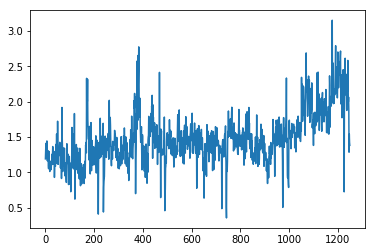

In [4]:
plt.plot(data.Volume);

## Logistic Regression

Next, we will fit a logistic regression model in order to predict `Direction` using `Lag1` through `Lag5` and `Volume`.

In [5]:
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = np.where(data.Direction.values == 'Up', 1, 0)
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Tue, 18 Sep 2018   Deviance:                       1727.6
Time:                        12:59:58   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

The smallest p-value here is associated with `Lag1`. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between `Lag1` and `Direction`.

The `predict()` method can be used to predict the probability that the market will go up, given values of the predictors. We'll predict the first 10 observations of the training set, we know that these correspond to the value `'Up'` or `1`.

In [6]:
pred = model.predict(sm.add_constant(X)[:10])
pred

0    0.507084
1    0.481468
2    0.481139
3    0.515222
4    0.510781
5    0.506956
6    0.492651
7    0.509229
8    0.517614
9    0.488838
dtype: float64

In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, `Up` or `Down`. The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than `0.5`.

In [7]:
pred = model.predict(sm.add_constant(X))
pred_s = np.where(pred > 0.5, 'Up', 'Down')

In [8]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y, y_pred=pred > 0.5)
matrix

array([[145, 457],
       [141, 507]])

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions.

The `mean()` function can be used to compute the fraction of days for which the prediction was correct.

In [9]:
np.mean(y == (pred > 0.5))

0.5216

In this case, logistic regression correctly predicted the movement of the market 52.2 % of the time.

At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1,250 observations. In other words, `100 − 52.2 = 47.8%` is the training error rate. As we have seen previously, the training error rate is often overly optimistic it tends to underestimate the test error rate. In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in practice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [10]:
train = data.Year < 2005
xtrain, ytrain = X[train], y[train]
xtest, ytest = X[~train], y[~train]

model_2 = sm.GLM(ytrain, sm.add_constant(xtrain), family=sm.families.Binomial()).fit()
ypred = model_2.predict(sm.add_constant(xtest))

Notice that we have trained and tested our model on two completely separate data sets: training was performed using only the dates before 2005, and testing was performed using only the dates in 2005. Finally, we compute the predictions for 2005 and compare them to the actual movements of the market over that time period.

In [11]:
confusion_matrix(y_true=ytest, y_pred=ypred > 0.5).T

array([[77, 97],
       [34, 44]])

In [12]:
np.mean(ytest == (ypred > 0.5))

0.4801587301587302

The results are rather disappointing: the test error rate is 52%, which is worse than random guessing! Of course this result is not all that surprising, given that one would not generally expect to be able to use previous days’ returns to predict future market performance.

We recall that the logistic regression model had very underwhelming p-values associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to `Lag1`. Perhaps by removing the variables that appear not to be helpful in predicting Direction, we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement. Below we have refit the logistic regression using just `Lag1` and `Lag2`, which seemed to have the highest predictive power in the original logistic regression model.

In [13]:
X = sm.add_constant(X[['Lag1', 'Lag2']])

xtrain, ytrain = X[train], y[train]
xtest, ytest = X[~train], y[~train]

model_3 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
ypred = model_3.predict(xtest)

confusion_matrix(y_true=ytest, y_pred=ypred > 0.5).T

array([[ 35,  35],
       [ 76, 106]])

In [14]:
np.mean(ytest == (ypred > 0.5))

0.5595238095238095

Now the results appear to be more promising: 56 % of the daily movements have been correctly predicted. The confusion matrix suggests that on days when logistic regression predicts that the market will decline, it is only correct 50 % of the time. However, on days when it predicts an increase in the market, it has a 58 % accuracy rate.

Suppose that we want to predict the returns associated with particular values of `Lag1` and `Lag2`. In particular, we want to predict Direction on a day when `Lag1` and `Lag2` equal `1.2` and `1.1`, respectively, and on a day when they equal `1.5` and `−0.8`.

In [15]:
obs1 = [1.0, 1.2, 1.1]
obs2 = [1.0, 1.5, -0.8]
model_3.predict(np.array([obs1, obs2]))

array([0.47914624, 0.49609387])

## Linear Discriminant Analysis

Now we will perform LDA on the Smarket data. Statsmodels (`sm`) doesn't provide LDA so we'll grab `sklearn`s [implementation](http://scikit-learn.org/stable/modules/lda_qda.html).

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='lsqr')
lda.fit(xtrain, ytrain);

In [17]:
lda.priors_

array([0.49198397, 0.50801603])

The LDA output indicates that `π1 = 0.492` and `π2 = 0.508`, in other words 49.2% of the training observations correspond to days during which the market went down. It also provides the group means:

In [18]:
lda.means_[:, 1:]  # ignore constants

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

Thesse are the average of each predictor within each class, and are used by LDA as estimates of µk. These suggest that there is a tendency for the previous two days returns to be negative on days when the market increases, and a tendency for the previous days returns to be positive on the days when the market declines.

As we observed, the LDA and logistic regression predictions are almost identical.

In [19]:
ypred = lda.predict_proba(xtest)
confusion_matrix(y_true=ytest, y_pred=ypred[:, 1] > 0.5).T

array([[ 35,  35],
       [ 76, 106]])

We also have a `predict` method that yields then class labels. Note that this is the same as making `predict_proba >= 0.5`:

In [20]:
ypred_labels = lda.predict(xtest)
all(ypred_labels == (ypred[:, 1] > 0.5))

True

If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so with `predict_proba`.

For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day—say, if the posterior probability is at least 90 %.

In [21]:
np.sum(ypred[:, 1] >= 0.9)

0

No days in 2005 meet that threshold! In fact, the greatest posterior prob- ability of decrease in all of 2005 was 54.22 %.

In [22]:
np.max(ypred[:, 1])

0.5422816337702675

## Quadratic Discriminant Analysis

We will now fit a QDA model to the `Smarket` data. The syntax is identical to LDA

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

qda.fit(xtrain.drop('const', axis=1), ytrain);

qda.priors_

array([0.49198397, 0.50801603])

In [24]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [25]:
ypred = qda.predict_proba(xtest.drop('const', axis=1))
confusion_matrix(y_true=ytest, y_pred=ypred[:, 1] > 0.5).T

array([[ 30,  20],
       [ 81, 121]])

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## K-Nearest Neighbors

Now we'll perform KNN using `KNeighborsClassifier`. It works simliar to other classifiers we've seen.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain.drop('const', axis=1), ytrain)

ypred = knn.predict_proba(xtest.drop('const', axis=1))
confusion_matrix(y_true=ytest, y_pred=ypred[:, 1] > 0.5).T

array([[43, 58],
       [68, 83]])

The results using K = 1 are not very good, since only 50 % of the observations are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain.drop('const', axis=1), ytrain)

ypred = knn.predict_proba(xtest.drop('const', axis=1))
confusion_matrix(y_true=ytest, y_pred=ypred[:, 1] > 0.5).T

array([[48, 55],
       [63, 86]])

The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.